<a href="https://colab.research.google.com/github/Statistically-Inclined/Movie-Review-Classifier/blob/main/MovieReviewClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_movie = pd.read_csv('IMDB Dataset.csv')
df = df_movie.copy()

In [3]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
df.shape

(50000, 2)

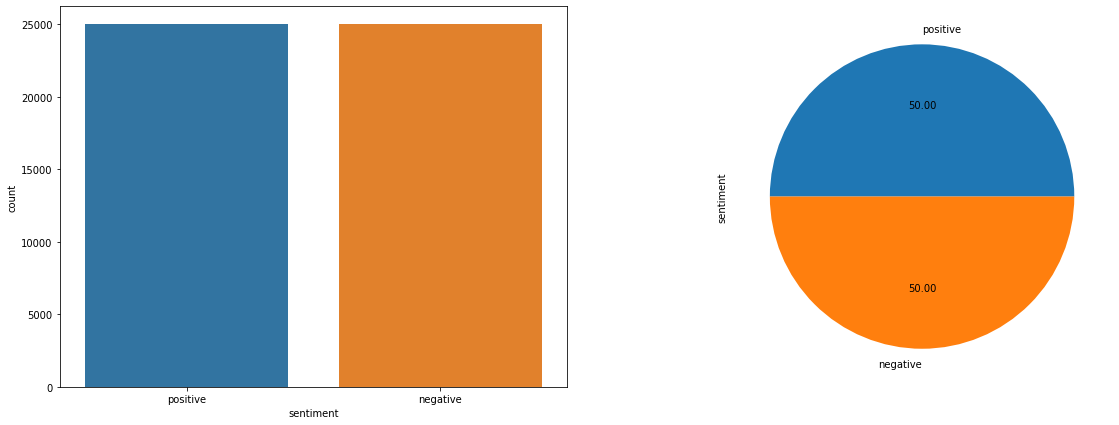

In [5]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.countplot(df['sentiment'])
plt.subplot(1,2,2)
df['sentiment'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [6]:
df['outcome'] = np.where(df['sentiment'] == 'positive', 1, 0)
df.head()

review sentiment  outcome
0  One of the other reviewers has mentioned that ...  positive        1
1  A wonderful little production. <br /><br />The...  positive        1
2  I thought this was a wonderful way to spend ti...  positive        1
3  Basically there's a family where a little boy ...  negative        0
4  Petter Mattei's "Love in the Time of Money" is...  positive        1

In [7]:
df['length'] = df['review'].apply(len)
df.head()

review sentiment  outcome  \
0  One of the other reviewers has mentioned that ...  positive        1   
1  A wonderful little production. <br /><br />The...  positive        1   
2  I thought this was a wonderful way to spend ti...  positive        1   
3  Basically there's a family where a little boy ...  negative        0   
4  Petter Mattei's "Love in the Time of Money" is...  positive        1   

   length  
0    1761  
1     998  
2     926  
3     748  
4    1317

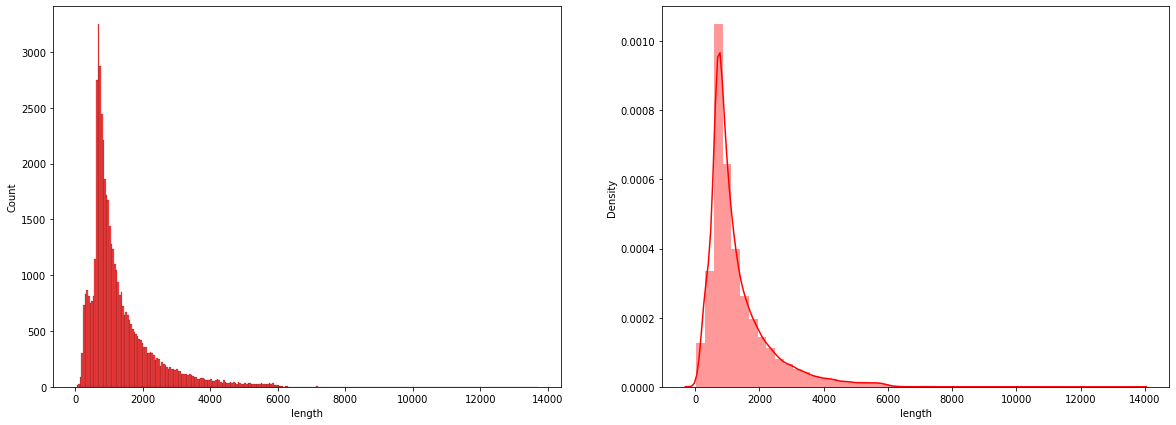

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(df['length'], color='red')
plt.subplot(1,2,2)
sns.distplot(df['length'], color='red')
plt.show()

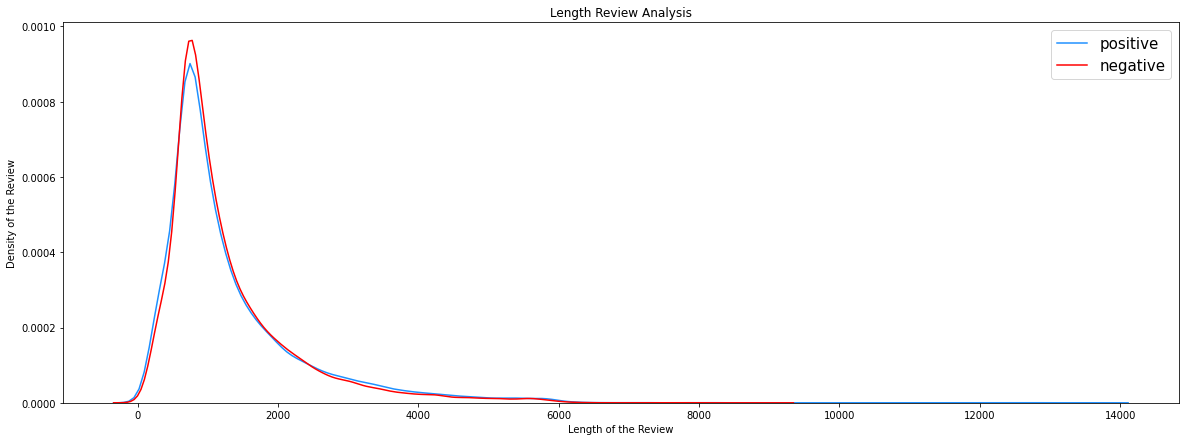

In [9]:
plt.figure(figsize=(20,7))
sns.distplot(df[df['outcome']==1]['length'], color='dodgerblue', hist=False)
sns.distplot(df[df['outcome']==0]['length'], color='red', hist=False)
plt.legend(['positive','negative'], fontsize=15)
plt.xlabel('Length of the Review')
plt.ylabel('Density of the Review')
plt.title('Length Review Analysis')
plt.show()

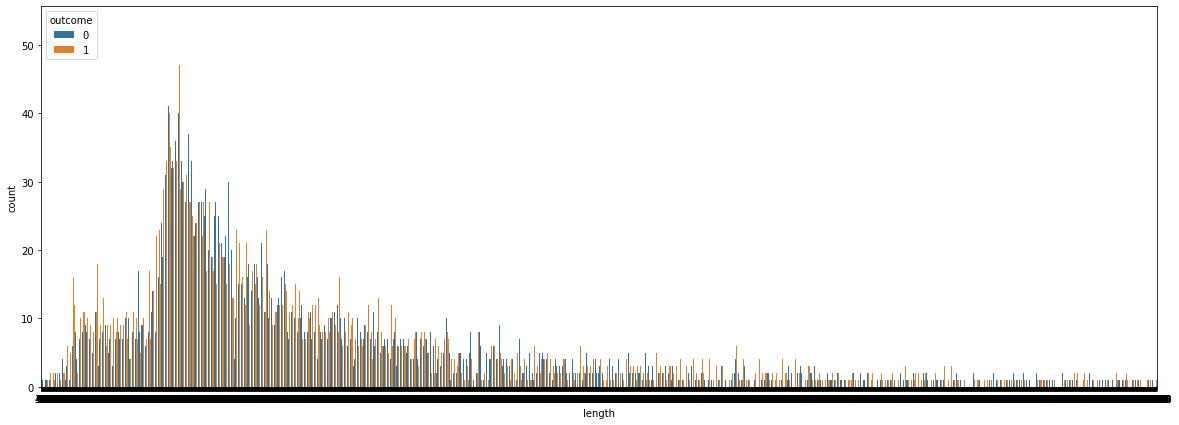

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(df['length'], hue=df['outcome'])
plt.show()

In [11]:
positive = df[df['outcome'] == 1]
negative = df[df['outcome'] == 0]

In [12]:
positive.describe()

outcome        length
count  25000.0  25000.000000
mean       1.0   1324.797680
std        0.0   1031.492627
min        1.0     65.000000
25%        1.0    691.000000
50%        1.0    968.000000
75%        1.0   1614.000000
max        1.0  13704.000000

In [13]:
negative.describe()

outcome        length
count  25000.0  25000.000000
mean       0.0   1294.064360
std        0.0    945.892669
min        0.0     32.000000
25%        0.0    706.000000
50%        0.0    973.000000
75%        0.0   1567.250000
max        0.0   8969.000000

### **TEXT PROCESSING**

In [14]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

print(nltk.download('stopwords'))
print(stopwords.words('english'))
print(nltk.download('wordnet'))
print(nltk.download('omw-1.4'))

True
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'tha

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
lemmatizer = WordNetLemmatizer()

In [18]:
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['review'][i])
#     review = review.lower()
#     review = review.split()
#     review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

In [19]:
def text_cleaning(text):
  text_punc_removed = [char for char in text if char not in string.punctuation ]
  text_punc_removed_join = ''.join(text_punc_removed)
  text_punc_removed_join_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  text_punc_removed_join_clean_final = ' '.join(text_punc_removed_join_clean)
  return text_punc_removed_join_clean_final

In [20]:
df['review_clean'] = df['review'].apply(text_cleaning)

In [21]:
df.head()

review sentiment  outcome  \
0  One of the other reviewers has mentioned that ...  positive        1   
1  A wonderful little production. <br /><br />The...  positive        1   
2  I thought this was a wonderful way to spend ti...  positive        1   
3  Basically there's a family where a little boy ...  negative        0   
4  Petter Mattei's "Love in the Time of Money" is...  positive        1   

   length                                       review_clean  
0    1761  One reviewers mentioned watching 1 Oz episode ...  
1     998  wonderful little production br br filming tech...  
2     926  thought wonderful way spend time hot summer we...  
3     748  Basically theres family little boy Jake thinks...  
4    1317  Petter Matteis Love Time Money visually stunni...

In [22]:
df['length_clean'] = df['review_clean'].apply(len)
df.head()

review sentiment  outcome  \
0  One of the other reviewers has mentioned that ...  positive        1   
1  A wonderful little production. <br /><br />The...  positive        1   
2  I thought this was a wonderful way to spend ti...  positive        1   
3  Basically there's a family where a little boy ...  negative        0   
4  Petter Mattei's "Love in the Time of Money" is...  positive        1   

   length                                       review_clean  length_clean  
0    1761  One reviewers mentioned watching 1 Oz episode ...          1168  
1     998  wonderful little production br br filming tech...           674  
2     926  thought wonderful way spend time hot summer we...           591  
3     748  Basically theres family little boy Jake thinks...           473  
4    1317  Petter Matteis Love Time Money visually stunni...           876

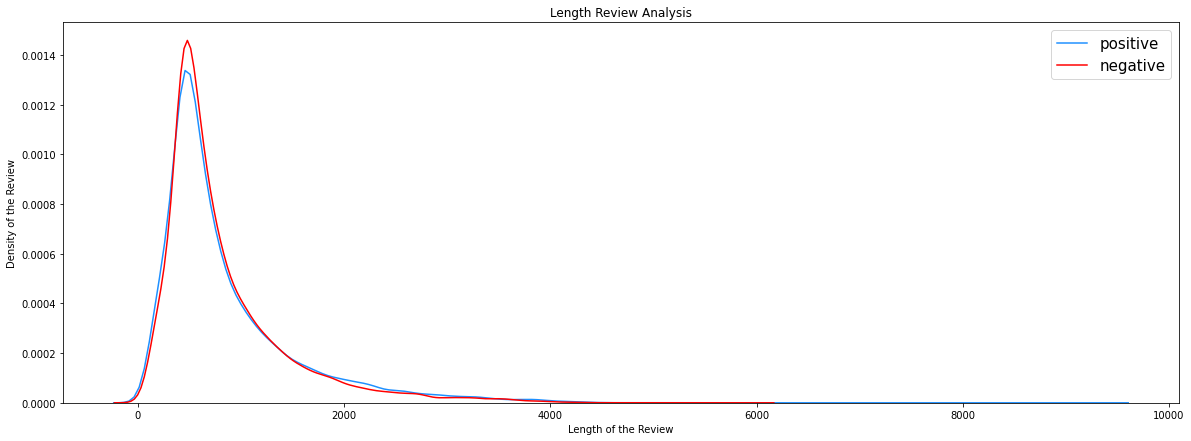

In [23]:
plt.figure(figsize=(20,7))
sns.distplot(df[df['outcome']==1]['length_clean'], color='dodgerblue', hist=False)
sns.distplot(df[df['outcome']==0]['length_clean'], color='red', hist=False)
plt.legend(['positive','negative'], fontsize=15)
plt.xlabel('Length of the Review')
plt.ylabel('Density of the Review')
plt.title('Length Review Analysis')
plt.show()

### **TF-IDF VECTORIZER**

In [28]:
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df['review_clean'])

In [29]:
df_tfidf.shape

(50000, 180355)

In [35]:
print(tfidf.get_feature_names())

['00', '000', '0000000000001', '00000001', '000001', '00000110', '0001', '00015', '001', '0010', '002', '00383042', '006', '0069', '007', '0079', '007br', '007s', '0080', '0083', '009', '00agent', '00s', '00schneider', '01', '010', '01000', '010606', '010707', '010br', '010makes', '0110', '012310', '0126', '0130', '013007', '02', '0205', '0210', '0230', '029', '02br', '03', '030', '03092005', '0310', '039', '03oct2009', '04', '04082007', '041', '044', '048', '05', '050', '0510', '053105', '05br', '06', '060241', '0615', '06and', '06br', '06th', '07', '075', '079', '07kiloton', '08', '081006', '0815', '087', '089', '08th', '09', '09082009', '091505', '09br', '0and', '0br', '0clock', '0f', '0ne', '0r', '0s', '0stars', '0ttbr', '0when', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000', '10000000000', '1000000000000', '1000000000000010', '1000000000000010000000000000', '100000dm', '100001', '10002000', '10005000', '1000lb', '1000month', '1000pm', '10

In [36]:
X = df_tfidf
y = df['outcome'].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

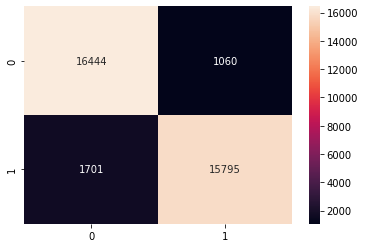

In [41]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='g')

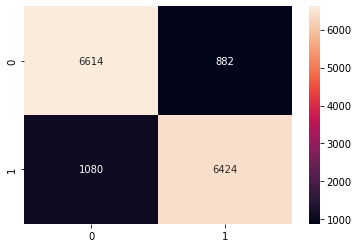

In [42]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='g')

In [43]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7496
           1       0.88      0.86      0.87      7504

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [44]:
print(accuracy_score(y_test, y_predict_test))

0.8692


### **COUNT VECTORIZER**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
df_cv = cv.fit_transform(df['review_clean'])

In [46]:
df_cv.shape

(50000, 180355)

In [48]:
print(cv.get_feature_names())

['00', '000', '0000000000001', '00000001', '000001', '00000110', '0001', '00015', '001', '0010', '002', '00383042', '006', '0069', '007', '0079', '007br', '007s', '0080', '0083', '009', '00agent', '00s', '00schneider', '01', '010', '01000', '010606', '010707', '010br', '010makes', '0110', '012310', '0126', '0130', '013007', '02', '0205', '0210', '0230', '029', '02br', '03', '030', '03092005', '0310', '039', '03oct2009', '04', '04082007', '041', '044', '048', '05', '050', '0510', '053105', '05br', '06', '060241', '0615', '06and', '06br', '06th', '07', '075', '079', '07kiloton', '08', '081006', '0815', '087', '089', '08th', '09', '09082009', '091505', '09br', '0and', '0br', '0clock', '0f', '0ne', '0r', '0s', '0stars', '0ttbr', '0when', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000', '1000000000', '10000000000', '1000000000000', '1000000000000010', '1000000000000010000000000000', '100000dm', '100001', '10002000', '10005000', '1000lb', '1000month', '1000pm', '10

In [49]:
X = df_tfidf
y = df['outcome'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

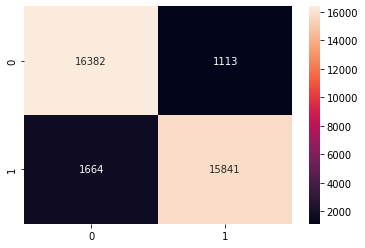

In [52]:
y_predict_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='g')

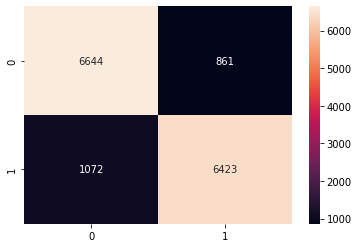

In [53]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='g')

In [54]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      7505
           1       0.88      0.86      0.87      7495

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



In [55]:
print(accuracy_score(y_test, y_predict_test))

0.8711333333333333
